In [137]:

import pandas as pd
import numpy as np
import datetime as dt
import random
#import pyarrow

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from config.paths import ROOT_DIR, SAMPLE_DIR, PRICES_DIR

import src.config as files
# import src.visualization as viz
# import src.process as process


In [138]:
stations_info = pd.read_csv(ROOT_DIR / 'data' / 'stations.csv')
stations_data = pd.read_csv(SAMPLE_DIR / 'stations' / '2023-05-03-stations.csv')
prices_data = pd.read_csv(SAMPLE_DIR / 'prices' /'2023-05-03-prices.csv')

In [139]:
# rename column 'A' to 'new_column'
prices_data = prices_data.rename(columns={'station_uuid': 'uuid'})

In [140]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('crude_oil_data_2014_2023.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert 'price' column to numeric
df['crude_oil_price'] = pd.to_numeric(df['crude_oil_price'], errors='coerce')

# Save the DataFrame as a new CSV file
#df.to_csv('crude_oil_data.csv', index=False)


# Print the updated DataFrame info
df.head()


,date,crude_oil_price
0,2014-01-02,107.94
1,2014-01-03,106.57
2,2014-01-06,106.71
3,2014-01-07,107.01
4,2014-01-08,107.42


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443 entries, 0 to 2442
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2443 non-null   datetime64[ns]
 1   crude_oil_price  2443 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.3 KB


In [142]:
import pandas as pd
import numpy as np

data = df.copy()

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Sort the data by date
data.sort_values('date', inplace=True)



# Create a new DataFrame with a complete date range (including weekends)
date_range = pd.date_range(start=data['date'].min(), end=data['date'].max(), freq='D')
complete_data = pd.DataFrame({'date': date_range})


# Merge the complete date range DataFrame with the original data
merged_data = complete_data.merge(data, on='date', how='left')

# Find the indices of remaining missing values
missing_indices = merged_data['crude_oil_price'].isnull()

# Iterate through the missing indices and fill with mean of previous Monday and next day Friday
for i in range(len(merged_data)):
    if missing_indices.iloc[i]:
        # Find the previous Monday or the day before (Saturday)
        prev_monday = merged_data['crude_oil_price'].loc[i - 1]
        j = 1
        while np.isnan(prev_monday):
            prev_monday = merged_data['crude_oil_price'].loc[i - 1 - j]
            j += 1

        # Find the next day Friday 
        next_friday = merged_data['crude_oil_price'].loc[i + 1]
        j = 1
        while np.isnan(next_friday):
            next_friday = merged_data['crude_oil_price'].loc[i + 1 + j]
            j += 1

        # Fill the missing value with the mean of previous Monday and next day Friday
        merged_data['crude_oil_price'].loc[i] = ((prev_monday + next_friday) / 2)

# Save the filled/imputed data to a new CSV file
merged_data.to_csv('fill_crude_oil_2014_2023.csv', index=False)


/var/folders/8x/cz487gy55dx6vlxs84h83w7h0000gn/T/ipykernel_87239/4152740824.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['crude_oil_price'].iloc[i] = ((prev_monday + next_friday) / 2)
/var/folders/8x/cz487gy55dx6vlxs84h83w7h0000gn/T/ipykernel_87239/4152740824.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['crude_oil_price'].iloc[i] = ((prev_monday + next_friday) / 2)
/var/folders/8x/cz487gy55dx6vlxs84h83w7h0000gn/T/ipykernel_87239/4152740824.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

In [100]:


# data = df.copy()

# # Convert the 'date' column to datetime
# data['date'] = pd.to_datetime(data['date'])

# # Create a new DataFrame with a complete date range (including weekends)
# date_range = pd.date_range(start=data['date'].min(), end=data['date'].max(), freq='D')
# complete_data = pd.DataFrame({'date': date_range})


# # Merge the complete date range DataFrame with the original data
# merged_data = complete_data.merge(data, on='date', how='left')

# # Fill missing values (Saturdays and Sundays) with mean of previous Monday and following Friday
# # merged_data['crude_oil_price'] = merged_data.groupby(merged_data['date'].dt.isocalendar().week)['crude_oil_price'].transform(lambda x: x.fillna((x.bfill() + x.ffill()).round(2)))
# merged_data['crude_oil_price'] = merged_data.groupby(merged_data['date'].dt.isocalendar().week)['crude_oil_price'].transform(lambda x: x.fillna((x.bfill())))

# # Save the filled/imputed data to a new CSV file
# merged_data.to_csv('filled_crude_oil_2014_2023.csv', index=False)


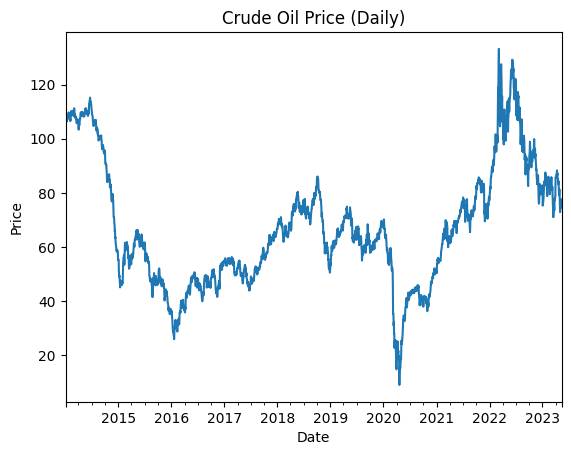

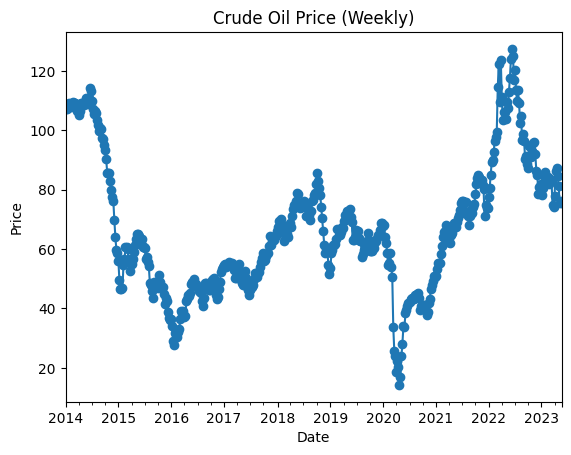

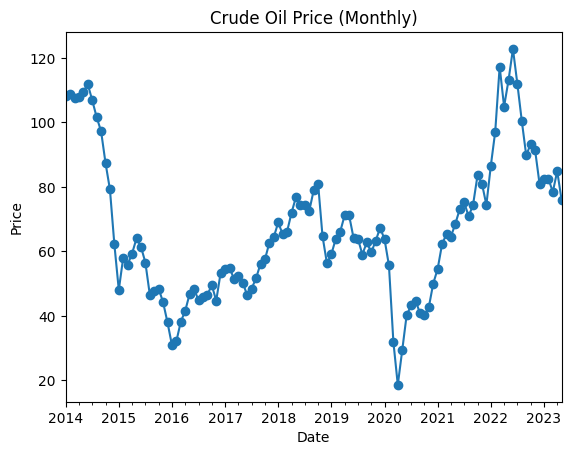

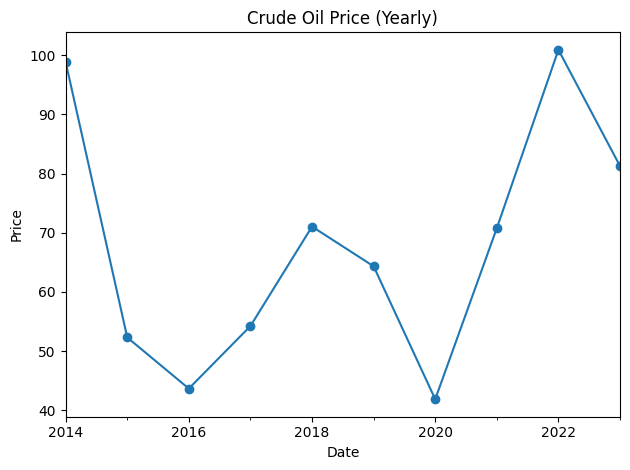

In [32]:
df = data.copy()

# Set the 'date' column as the DataFrame's index
df.set_index('date', inplace=True)

# Create daily plot
fig, ax = plt.subplots()
df['crude_oil_price'].plot(ax=ax)
ax.set(title='Crude Oil Price (Daily)', xlabel='Date', ylabel='Price')

# Create weekly plot
fig, ax = plt.subplots()
df['crude_oil_price'].resample('W').mean().plot(ax=ax, marker='o')
ax.set(title='Crude Oil Price (Weekly)', xlabel='Date', ylabel='Price')

# Create monthly plot
fig, ax = plt.subplots()
df['crude_oil_price'].resample('M').mean().plot(ax=ax, marker='o')
ax.set(title='Crude Oil Price (Monthly)', xlabel='Date', ylabel='Price')

# Create yearly plot
fig, ax = plt.subplots()
df['crude_oil_price'].resample('Y').mean().plot(ax=ax, marker='o')
ax.set(title='Crude Oil Price (Yearly)', xlabel='Date', ylabel='Price')

# Adjust subplots layout
plt.tight_layout()

# Show the plots
plt.show()


In [12]:
df['crude_oil_price'].isnull().sum()

0

In [13]:
missed_price = df[df['crude_oil_price'].isnull()]
missed_price.head(15)

,crude_oil_price
date,


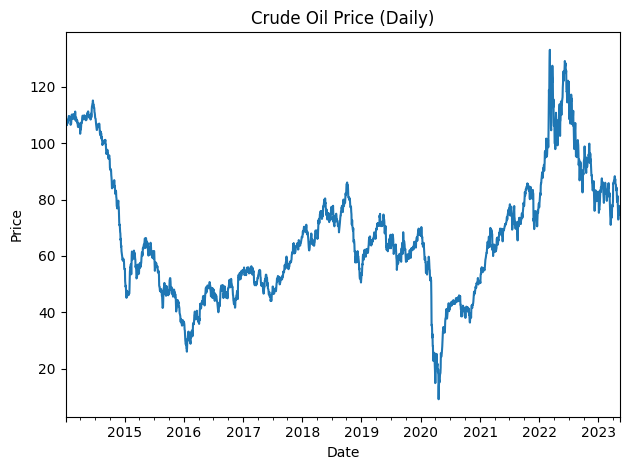

In [17]:
# Read the CSV file
df = pd.read_csv('crude_oil_data_2014_2023.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert 'price' column to numeric
df['crude_oil_price'] = pd.to_numeric(df['crude_oil_price'], errors='coerce')

# Interpolate missing values using previous and next non-null values
df['crude_oil_price'].interpolate(method='linear', inplace=True)

# Fill remaining NaN values with the mean of neighboring values
df['crude_oil_price'].fillna(df['crude_oil_price'].mean(), inplace=True)

# Round the 'crude_oil_price' column to two decimal places
df['crude_oil_price'] = df['crude_oil_price'].round(2)

# Set the 'date' column as the DataFrame's index
df.set_index('date', inplace=True)

# Create daily plot
fig, ax = plt.subplots()
df['crude_oil_price'].plot(ax=ax)
ax.set(title='Crude Oil Price (Daily)', xlabel='Date', ylabel='Price')

# Adjust subplots layout
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
df['crude_oil_price'].isnull().sum()
# Save the DataFrame as a new CSV file
# Save the DataFrame as a new CSV file
#df.to_csv('crude_oil_data_2014_2023.csv')

0

In [19]:
df.head()

,crude_oil_price
date,
2014-01-02,107.94
2014-01-03,106.57
2014-01-06,106.71
2014-01-07,107.01
2014-01-08,107.42


In [20]:
# Set the 'date' column as the DataFrame's index
df.set_index('date', inplace=True)

# Create daily plot
fig, ax = plt.subplots()
df['crude_oil_price'].plot(ax=ax)
ax.set(title='Crude Oil Price (Daily)', xlabel='Date', ylabel='Price')



# Adjust subplots layout
plt.tight_layout()

# Show the plots
plt.show()


KeyError: "None of ['date'] are in the columns"